   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

/home/andora/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/andora/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/andora/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


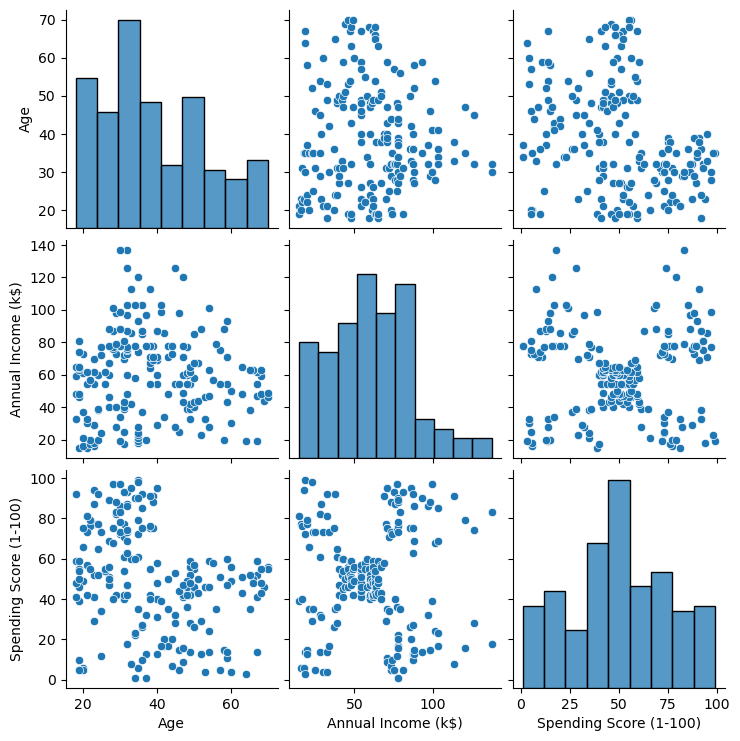

Gender
Female    112
Male       88
Name: count, dtype: int64


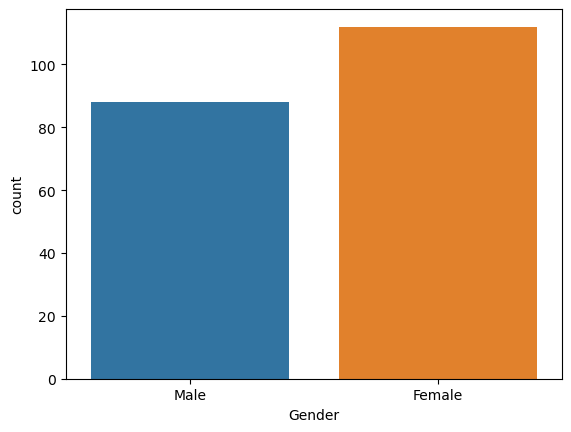

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


/tmp/ipykernel_72619/3949891553.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)
/tmp/ipykernel_72619/3949891553.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)


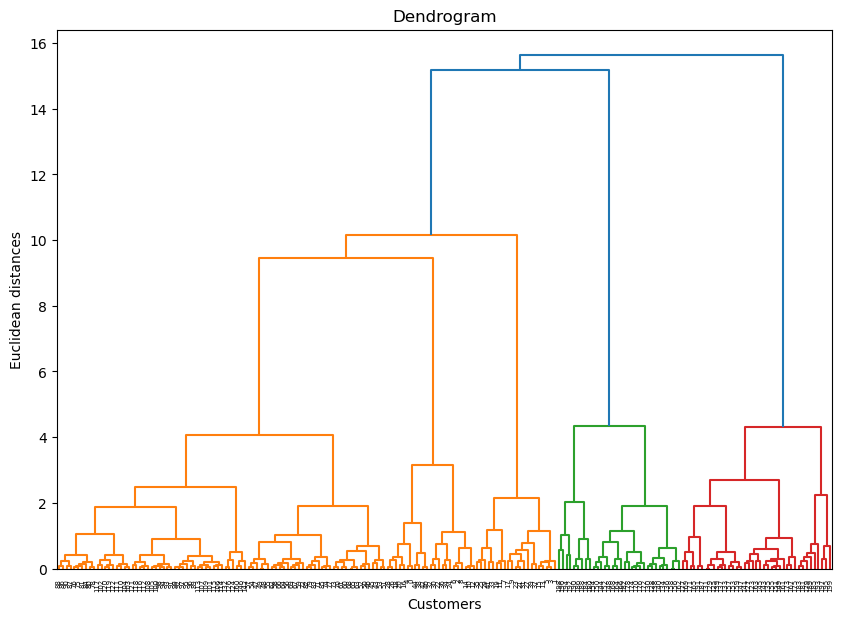

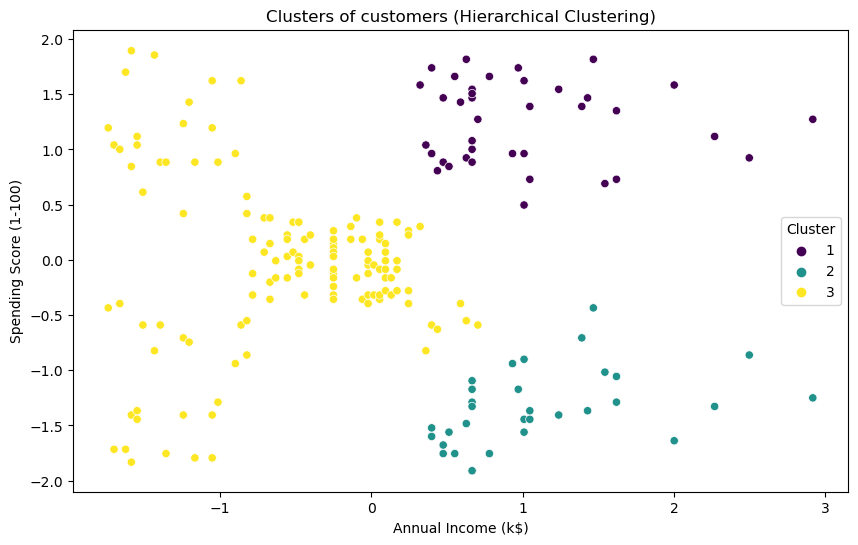

Silhouette Score: 0.4610481446570447
Calinski-Harabasz Index: 143.77956237851728


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Leer archivo CSV
data = pd.read_csv('Mall_Customers.csv')

# Visualizar primeros registros
print(data.head())

# Información general de los datos
print(data.info())

# Estadísticas descriptivas
print(data.describe())

# Convertir valores infinitos a NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Distribución de las variables numéricas
sns.pairplot(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].dropna())
plt.show()

# Conteo de valores categóricos
print(data['Gender'].value_counts())

# Gráficas de distribución
sns.countplot(x='Gender', data=data)
plt.show()

# Convertir variables categóricas a numéricas
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Verificar valores faltantes
print(data.isnull().sum())

# Escalar datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Convertir a DataFrame para visualización
data_scaled = pd.DataFrame(data_scaled, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

# Selección de características
X = data_scaled[['Annual Income (k$)', 'Spending Score (1-100)']]

# Asegurarse de que no haya valores infinitos en X
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.dropna(inplace=True)

# Realizar el clustering jerárquico
linked = linkage(X, method='ward')

# Crear un dendrograma
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# Determinar el número óptimo de clusters (por ejemplo, 3 clusters)
num_clusters = 3
data['Cluster'] = fcluster(linked, num_clusters, criterion='maxclust')

# Visualizar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X, x='Annual Income (k$)', y='Spending Score (1-100)', hue=data['Cluster'], palette='viridis', legend='full')
plt.title('Clusters of customers (Hierarchical Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Evaluar el desempeño del modelo
silhouette_avg = silhouette_score(X, data['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

calinski_harabasz_avg = calinski_harabasz_score(X, data['Cluster'])
print(f'Calinski-Harabasz Index: {calinski_harabasz_avg}')
